# Make All Figures for Main Manuscript

Kendra Wyant  
October 1, 2025

In [ ]:

suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(tidymodels))
suppressPackageStartupMessages(source("https://github.com/jjcurtin/lab_support/blob/main/format_path.R?raw=true"))

theme_set(theme_classic())

path_models <- format_path(str_c("risk/models/messages"))

model_full <- read_rds(here::here(path_models, "best_model_v17_kfold_full.rds"))


In [ ]:
feat_imp <- model_full |> 
  tidy() |> 
  mutate(estimate = -1 * estimate) |> 
  filter(abs(estimate) > 0) |> 
  filter(term != "(Intercept)") |> 
  mutate(term = case_match(term,
                           "abstinence_confidence" ~ "Abstinence confidence", 
                           "abstinence_goal_Yes" ~ "Goal of abstinence",
                           "efficacy_neg_affect" ~ "Negative affect efficacy",
                           "craving_total" ~ "Craving",
                           "demo_income" ~ "Income",
                           "demo_sex_Male" ~ "Male",
                           "indiv_doa" ~ "Individual alcohol counseling",
                           "group_doa" ~ "Group alcohol counseling",
                           .default = term)) |> 
  mutate(term = if_else(str_detect(term, "cont_type_abr.friend"), "Communications with friends", term),
         term = if_else(str_detect(term, ".NonDrinker"), "Communications with non-drinkers", term),
         term = if_else(str_detect(term, ".Drinker"), "Communications with drinkers", term)) |> 
  group_by(term) |> 
  summarise(estimate = mean(estimate)) |> 
  arrange(desc(abs(estimate))) |> 
  mutate(term = reorder(term, abs(estimate)))  |> 
  ggplot(aes(x = estimate, y = term, fill = estimate > 0)) +
  geom_col() +
  scale_fill_manual(values = c("TRUE" = "tomato", "FALSE" = "steelblue")) +
  labs(
    x = "Coefficient",
    y = NULL,
    title = "Feature Importance"
  ) +
  theme(legend.position = "none")



Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loaded glmnet 4.1-8

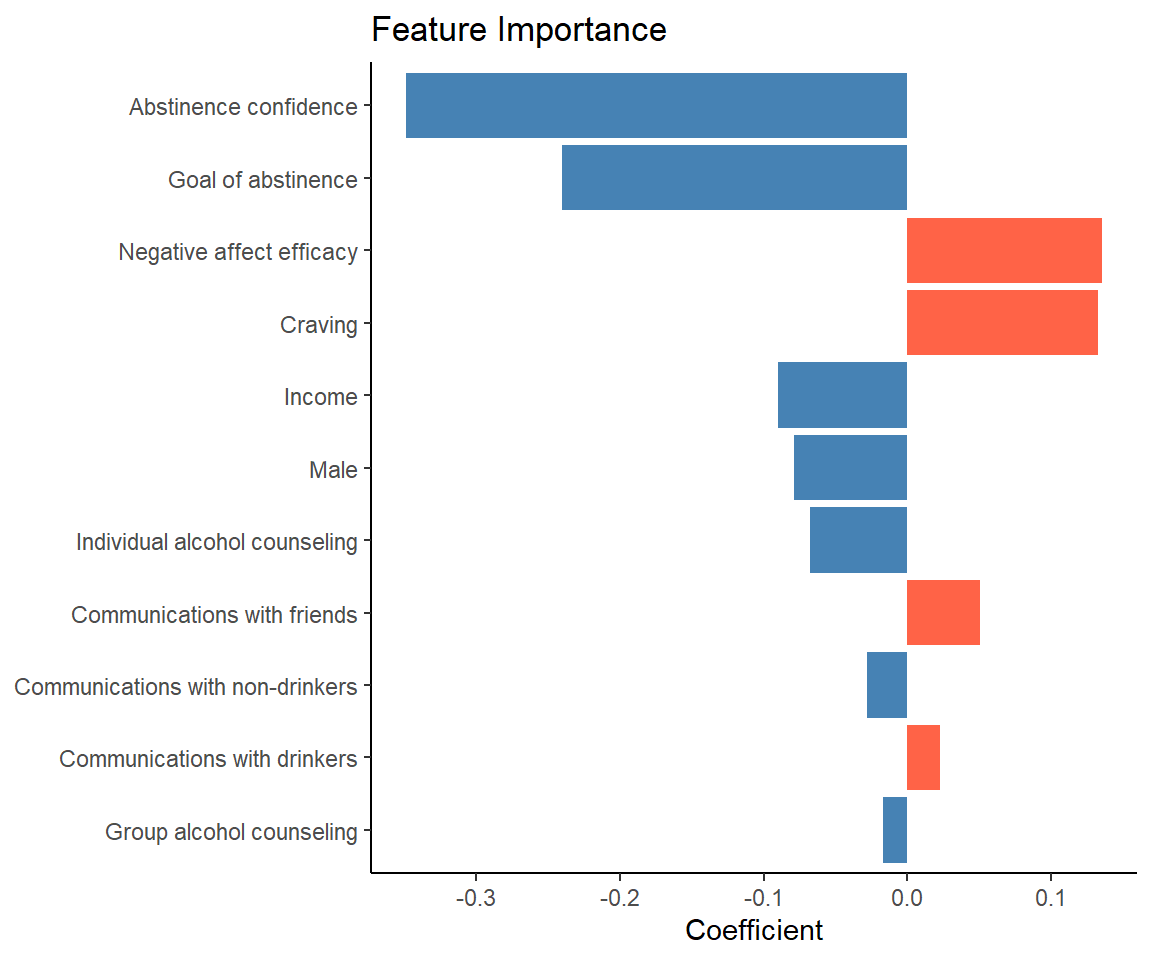

In [ ]:

feat_imp 
